# Social Networks
# CSSH @ RWTH
# Summer 2019
## Practice 4

### Today we are going to find communities in networks using some of the methods we have learned so far. You'll be doing more of the work today! Please work together with your colleagues.

In [209]:
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

In [210]:
from networkx.algorithms import community
#to get an implementation of the Louvain method: pip install python-louvain
import community as louvain

## Start with the karate club

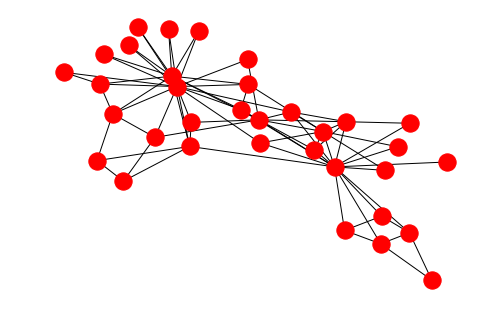

In [211]:
G=nx.karate_club_graph()
nx.draw(G)

## 1. Implement the Girvan-Newman community detection algorithm. Don't use the G-N function in NetworkX, but feel free to use others. Wikipedia outlines the algorithm for us:

0. Create an empty list to hold the communities at different levels.
1. The betweenness of all existing edges in the network is calculated first.
2. The edge with the highest betweenness is removed.
3. The betweenness of all edges affected by the removal is recalculated.
4. Find the connected components of the graph - if there is a change in the number of components, update the list.
5. Steps 2, 3, and 4 are repeated until no edges remain.

You should return a hierarchy of communities in the form of a list of lists, each list corresponding to a new partition of the network that appears when a new component becomes disconnected.


In [212]:
def girvan_newman(G):
    G2 = G.copy() #make a copy of the graph - as we are cutting edges we lose the original graph!
    partition_hierarchy = [] #initialize a list for the partitions at different levels
    components = list(nx.connected_components(G2)) #list the connected components
    while len(G2.edges) > 0: #loop: while we still have edges to cut, keep going
        edge_centrality = nx.edge_betweenness_centrality(G2) #calculate edge betweenness centrality
        central_edge = max(edge_centrality, key=edge_centrality.get) #get the most central edge
        G2.remove_edge(*central_edge) #remove this edge
        new_components = list(nx.connected_components(G2)) #get the connected components
        if len(new_components)>len(components): #check: are there more components than there were before?
            partition_hierarchy.append(list(nx.connected_components(G2))) #if yes- we have a new partition!
            components = new_components #update the list of components
    return partition_hierarchy #return the list of communities


### 1b. Apply the method to the ZKC network, extract the partition which results in two communities and  plot the network with the nodes colored by community membership.


[{0, 1, 3, 4, 5, 6, 7, 10, 11, 12, 13, 16, 17, 19, 21}, {32, 33, 2, 8, 9, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31}]


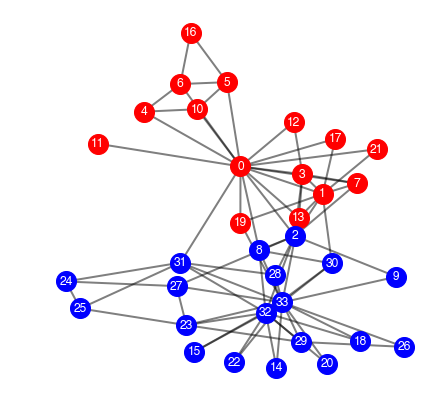

In [213]:
partition = girvan_newman(G)
two_components = [p for p in partition if len(p)==2][0]
print(two_components)

plt.figure(figsize=(7,7))
pos=nx.spring_layout(G) # positions for all nodes

nx.draw_networkx_nodes(G, pos, node_size=400, nodelist=two_components[0])
nx.draw_networkx_nodes(G, pos, node_size=400, nodelist=two_components[1], node_color='b')
nx.draw_networkx_edges(G, pos, alpha=0.5, width=2)

nx.draw_networkx_labels(G,pos,font_size=12, font_color="w")
plt.axis('off')
plt.show()

### 1c. Use community.modularity to calculate the modularity of this partition. The function takes two arguments: the graph and a list of lists of nodes, corresponding to the communities.

In [228]:
girvan_newman_mod = community.modularity(G,two_components)
community.modularity(G,two_components)

0.35996055226824225

## 1d. Go down the partition tree and calculate the modularity of the partitions generated when your method is left with 3, 4, ... up to 10 components. Plot the modularity as a function of your the number of communities.

Text(0,0.5,'modularity')

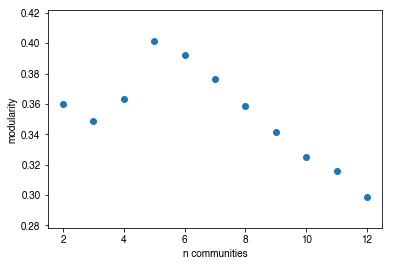

In [229]:
modularities = []
for i in range(11):
    modularities.append(community.modularity(G,partition[i]))
    
plt.scatter(x=range(2,13),y=modularities)
plt.xlabel('n communities')
plt.ylabel('modularity')

In [216]:
partition[3]

[{0, 1, 3, 7, 11, 12, 13, 17, 19, 21},
 {2, 24, 25, 27, 28, 31},
 {4, 5, 6, 10, 16},
 {8, 14, 15, 18, 20, 22, 23, 26, 29, 30, 32, 33},
 {9}]

## Plot the network with the best partition, according to the modularity.

[{0, 1, 3, 7, 11, 12, 13, 17, 19, 21}, {2, 24, 25, 27, 28, 31}, {4, 5, 6, 10, 16}, {32, 33, 8, 14, 15, 18, 20, 22, 23, 26, 29, 30}, {9}]


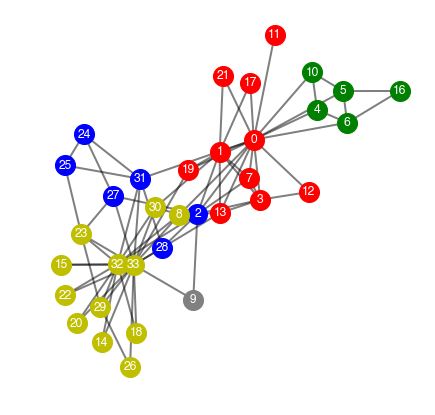

In [230]:
partition = girvan_newman(G)
five_components = [p for p in partition if len(p)==5][0]
print(five_components)

plt.figure(figsize=(7,7))
pos=nx.spring_layout(G) # positions for all nodes

nx.draw_networkx_nodes(G, pos, node_size=400, nodelist=five_components[0])
nx.draw_networkx_nodes(G, pos, node_size=400, nodelist=five_components[1], node_color='b')
nx.draw_networkx_nodes(G, pos, node_size=400, nodelist=five_components[2], node_color='g')
nx.draw_networkx_nodes(G, pos, node_size=400, nodelist=five_components[3], node_color='y')
nx.draw_networkx_nodes(G, pos, node_size=400, nodelist=five_components[4], node_color='grey')

nx.draw_networkx_edges(G, pos, alpha=0.5, width=2)

nx.draw_networkx_labels(G,pos,font_size=12, font_color="w")
plt.axis('off')
plt.show()

## 2. We could change the edge importance measure used to rank edges for cutting: define a new community detection called the Aachen method which ranks edges in decreasing order by the number of shared neighbors they have. 

### For example, the two nodes connected by an edge have 5 friends in common. Another two nodes connected by an edge have 0 friends in common. The latter edge should be ranked highest. Don't worry about ties for now!

### hint: look at how Networkx returns edge betweenness scores and replace those lines in the previous function with some new code.

In [218]:
def aachen(G):
    G2 = G.copy()
    partition_hierarchy = []
    components = list(nx.connected_components(G2))
    while len(G2.edges) > 0:
        edge_overlap_centrality = {}
        for edge in G2.edges():
            edge_overlap_centrality[edge]=len(list(nx.common_neighbors(G2,edge[0],edge[1])))
        central_edge = min(edge_overlap_centrality, key=edge_overlap_centrality.get)
        G2.remove_edge(*central_edge)
        new_components = list(nx.connected_components(G2))
        if len(new_components)>len(components):
            partition_hierarchy.append(list(nx.connected_components(G2)))
            components = new_components
    return partition_hierarchy

[{0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 13, 14, 15, 16, 18, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33}, {9}, {11}, {12}, {17}, {19}]


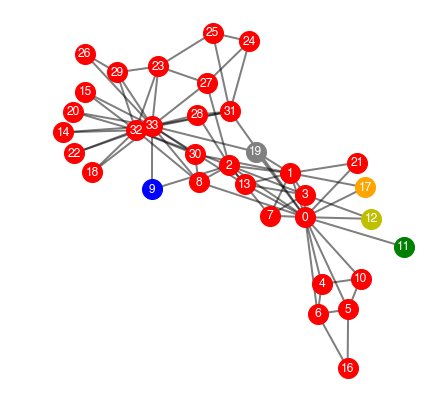

In [219]:
aachen_partition = aachen(G)
six_components = [p for p in aachen_partition if len(p)==6][0]
print(six_components)

plt.figure(figsize=(7,7))
pos=nx.spring_layout(G) # positions for all nodes

nx.draw_networkx_nodes(G, pos, node_size=400, nodelist=six_components[0])
nx.draw_networkx_nodes(G, pos, node_size=400, nodelist=six_components[1], node_color='b')
nx.draw_networkx_nodes(G, pos, node_size=400, nodelist=six_components[2], node_color='g')
nx.draw_networkx_nodes(G, pos, node_size=400, nodelist=six_components[3], node_color='y')
nx.draw_networkx_nodes(G, pos, node_size=400, nodelist=six_components[4], node_color='orange')
nx.draw_networkx_nodes(G, pos, node_size=400, nodelist=six_components[5], node_color='grey')

nx.draw_networkx_edges(G, pos, alpha=0.5, width=2)

nx.draw_networkx_labels(G,pos,font_size=12, font_color="w")
plt.axis('off')
plt.show()

Text(0,0.5,'modularity')

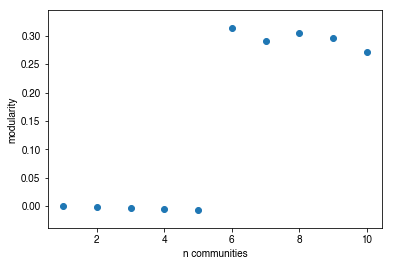

In [220]:
modularities = []
for i in range(1,11):
    modularities.append(community.modularity(G,aachen_partition[i]))
    
plt.scatter(x=range(1,11),y=modularities)
plt.xlabel('n communities')
plt.ylabel('modularity')

## 3. Compare the modularity of the best Girvan-Newman partition with the Louvain partition. The library Louvain has some slightly different syntax. Plot the two partitions side by side.

In [231]:
?louvain.best_partition

In [221]:
louvain_part = louvain.best_partition(G)
louvain_mod = louvain.modularity(louvain_part,G)
louvain_mod

0.4188034188034188

In [222]:
girvan_newman_mod = community.modularity(G,five_components)
print(girvan_newman_mod)
girvan_newman_mod_dict = {}
for comm in enumerate(five_components):
    for node in comm[1]:
        girvan_newman_mod_dict[node]=comm[0]

0.40129848783694877


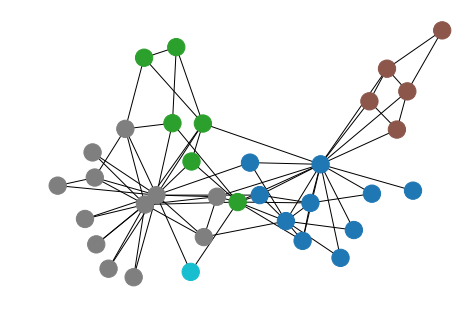

In [223]:
pos=nx.spring_layout(G) # positions for all nodes
nx.draw(G, pos=pos, node_color=[girvan_newman_mod_dict[x] for x in G.nodes()],cmap='tab10')

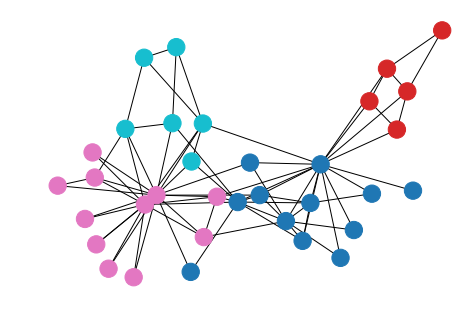

In [224]:
nx.draw(G, pos=pos, node_color=list(louvain_part.values()),cmap='tab10')

# Let's analyze a new network. In the mid 2000s Valdis Krebs, a network scientist, crawled data on book purchases. Looking at political books he collected network data in which books are linked if they are often purchased together.

In [232]:
B=nx.read_gml('/Users/johanneswachs/Downloads/polbooks/polbooks.gml')
nx.info(B)

'Name: \nType: Graph\nNumber of nodes: 105\nNumber of edges: 441\nAverage degree:   8.4000'

## Compare the Girvan-Newmann and Louvain methods again on this dataset.

In [233]:
louvain_part = louvain.best_partition(B)
louvain_mod = louvain.modularity(louvain_part,B)
louvain_mod

0.5204852916223178

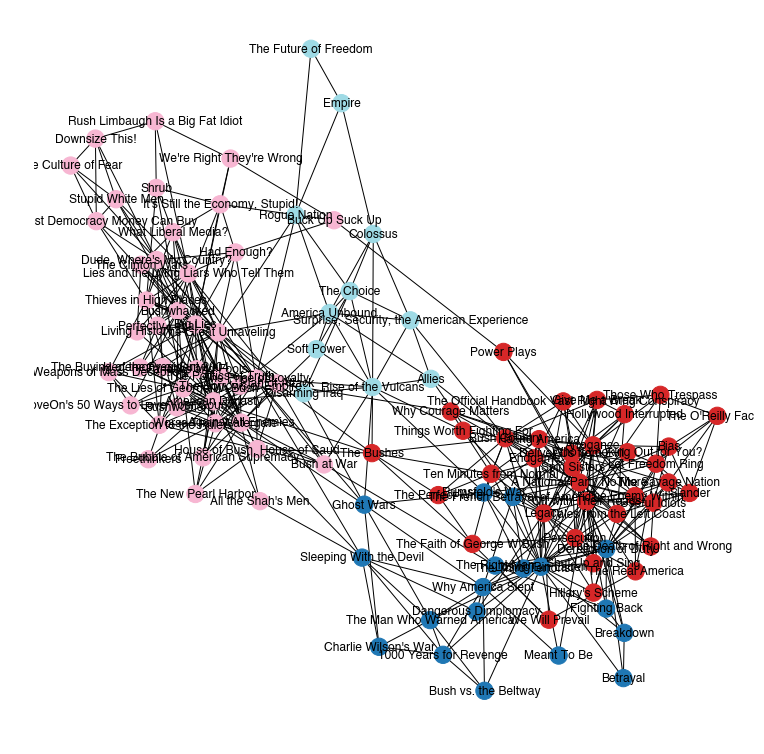

In [236]:
plt.figure(figsize=(10,10))
pos=nx.spring_layout(B)
nx.draw(B,pos=pos, node_color=list(louvain_part.values()),cmap='tab20')
x=nx.draw_networkx_labels(B,pos=pos)

## Explore the dataset - try to understand what the communites tell us.

### To review: calculate the diameter and average clustering coefficient of the network.
### To review: Fit a configuration model to this network's degree distribution. Plot it and calculate its modularity via a Louvain partition. 

-----------

## Finally: try to compare the run time of the Louvain method with your Girvan-Newman implementation. Jupyter allows this with the %timeit cellmagic. For example:

In [237]:
%timeit nx.clustering(B)

3.54 ms ± 62.7 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [238]:
%timeit louvain_part = louvain.best_partition(B)

8.13 ms ± 146 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [239]:
%timeit girvan_part = girvan_newman(B)


4.99 s ± 109 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [240]:
%timeit girvan_part = community.girvan_newman(B)

307 ns ± 10.3 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
